# **Portafolio de Inversión**



Acciones a elegir:

*   Grupo Bimbo, S.A.B. de C.V.
*   Gruma, S.A.B. de C.V.
*   Kimberly-Clark de México, S. A. B. de C. V.
*   Grupo Aeroportuario del Pacífico, S.A.B. de C.V.
*   BBVAMA2 PV
*   Alfa S.A.B. de C.V.


## **Acciones importadas**


In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd
import math as mat
from pandas_datareader import data
import yfinance as yf

In [ ]:
!pip install pandas-datareader
!pip install yfinance

In [ ]:
df_precios=pd.DataFrame()
activos=['BIMBOA.MX', 'GRUMAB.MX','KIMBERA.MX','GAPB.MX','BBVAMA2PV.MX', 'ALFAA.MX']
for i in activos:
  df_precios[i]=pd.DataFrame(yf.Ticker(i).history(start='2022-01-01', end='2024-11-08')['Close'])
df_precios


,BIMBOA.MX,GRUMAB.MX,KIMBERA.MX,GAPB.MX,BBVAMA2PV.MX,ALFAA.MX
Date,,,,,,
2022-01-03 00:00:00-06:00,59.000103,245.455475,26.432573,238.308273,NaN,13.924688
2022-01-04 00:00:00-06:00,59.415657,245.642410,26.576506,241.097168,NaN,13.851879
2022-01-05 00:00:00-06:00,57.602314,244.214615,26.237843,242.412048,NaN,13.396824
2022-01-06 00:00:00-06:00,60.152336,242.448608,26.568037,244.572891,NaN,13.487835
2022-01-07 00:00:00-06:00,60.898460,240.382004,26.889767,241.423843,NaN,13.242105
...,...,...,...,...,...,...
2024-11-01 00:00:00-06:00,60.307877,346.170013,28.515133,325.103455,10.17779,14.343002
2024-11-04 00:00:00-06:00,61.752670,345.010010,28.357590,327.156799,10.28848,13.983428
2024-11-05 00:00:00-06:00,61.703526,343.510010,28.337898,333.095093,10.25659,13.933487


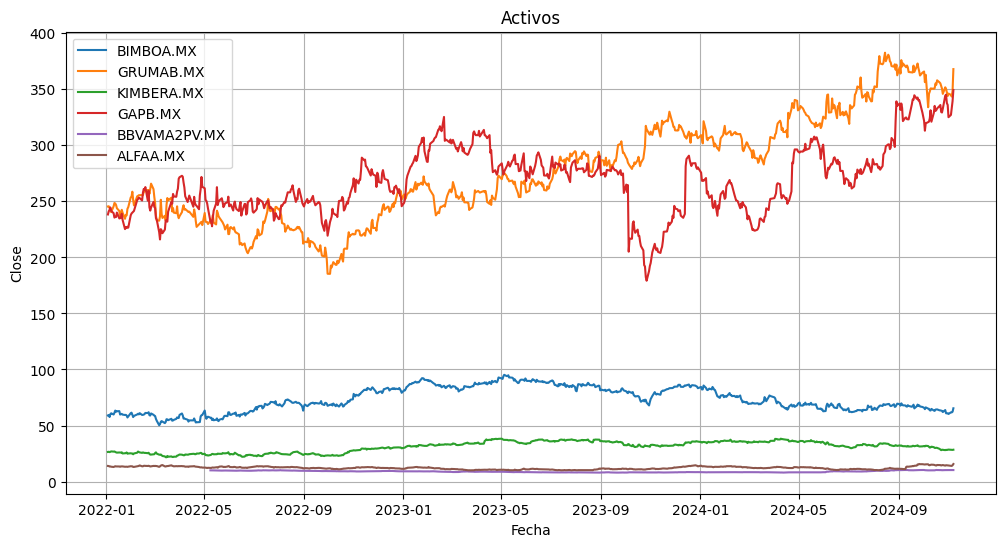

In [ ]:
activos = ['BIMBOA.MX', 'GRUMAB.MX','KIMBERA.MX','GAPB.MX','BBVAMA2PV.MX','ALFAA.MX']

plt.figure(figsize=(12,6))
for i in activos:
  plt.plot(df_precios[i])
plt.title('Activos')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend(activos)
plt.grid()
plt.show()

In [ ]:
df_precios_ren=np.log(df_precios).diff()
df_precios_ren=df_precios_ren.dropna()
df_precios_ren

,BIMBOA.MX,GRUMAB.MX,KIMBERA.MX,GAPB.MX,BBVAMA2PV.MX,ALFAA.MX
Date,,,,,,
2022-05-10 00:00:00-05:00,-0.000995,-0.009956,0.012266,0.002486,0.000000,-0.007485
2022-05-11 00:00:00-05:00,-0.036153,0.013684,0.027932,-0.021642,-0.004790,0.025224
2022-05-12 00:00:00-05:00,0.021107,0.018197,-0.000698,0.033866,0.001266,0.007299
2022-05-13 00:00:00-05:00,-0.024899,-0.028238,-0.012641,0.025344,-0.000729,-0.010969
2022-05-16 00:00:00-05:00,0.008939,-0.007134,0.003880,0.026175,-0.007655,0.021819
...,...,...,...,...,...,...
2024-11-01 00:00:00-06:00,-0.009892,0.006288,0.004499,-0.032987,-0.013257,-0.005556
2024-11-04 00:00:00-06:00,0.023674,-0.003357,-0.005540,0.006296,0.010817,-0.025389
2024-11-05 00:00:00-06:00,-0.000796,-0.004357,-0.000695,0.017988,-0.003104,-0.003578


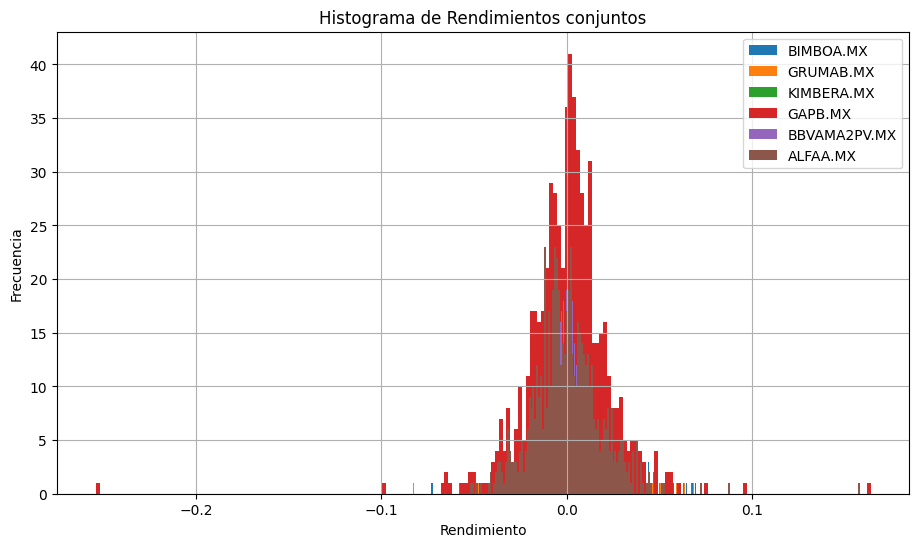

In [ ]:
plt.figure(figsize=(11,6))
for i in activos:
  plt.hist(df_precios_ren[i], bins=200, label=i)

plt.title('Histograma de Rendimientos conjuntos')
plt.xlabel('Rendimiento')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid()
plt.show()

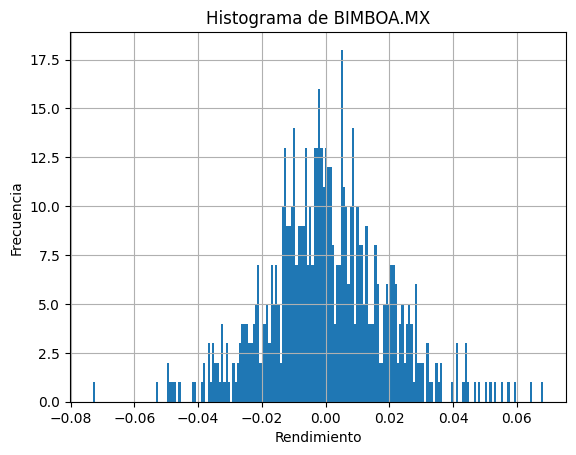

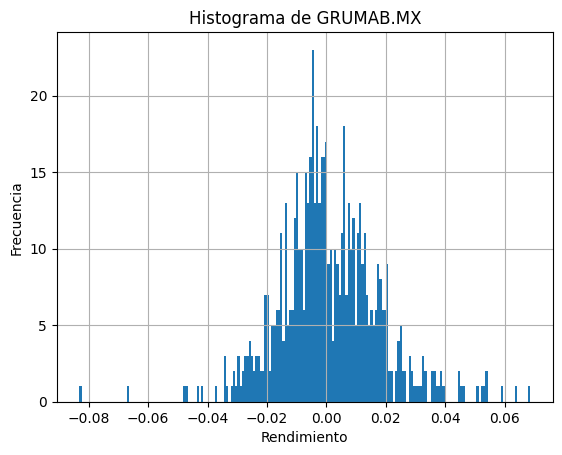

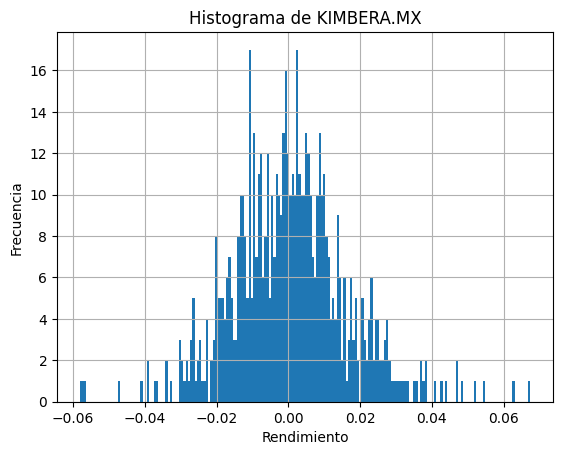

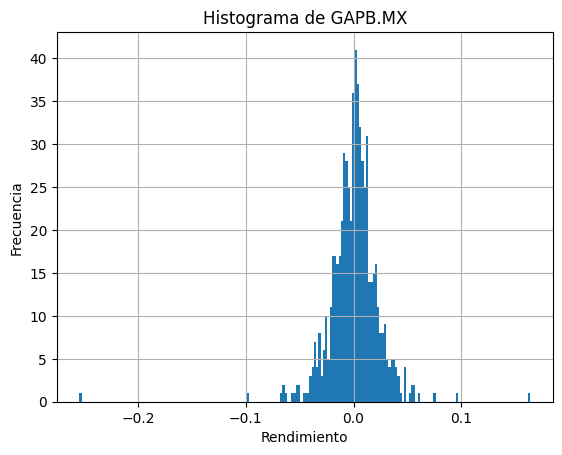

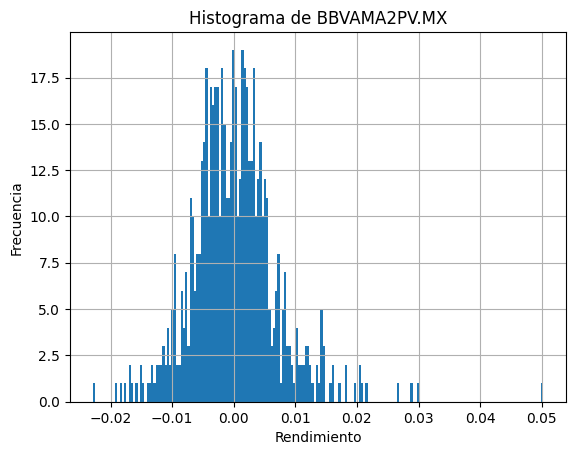

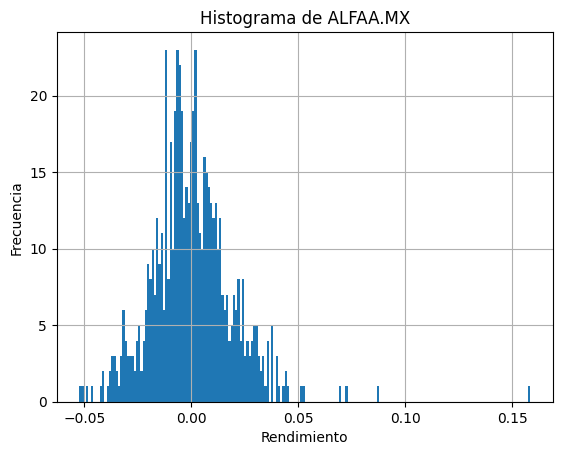

In [ ]:
for i in activos:
  plt.hist(df_precios_ren[i],bins=200)
  plt.title('Histograma de ' + i)
  plt.xlabel('Rendimiento')
  plt.ylabel('Frecuencia')
  plt.grid()
  plt.show()

In [ ]:
for i in activos:
  media = df_precios_ren[i].mean()*252
  volatilidad = np.sqrt(df_precios_ren[i].var()*252)

  print(f'La media de {i} es: {media}')
  print(f'La volatilidad de {i} es: {volatilidad}')

La media de BIMBOA.MX es: 0.054775940997178675
La volatilidad de BIMBOA.MX es: 0.2974690160784241
La media de GRUMAB.MX es: 0.1830322178527701
La volatilidad de GRUMAB.MX es: 0.2681049441915832
La media de KIMBERA.MX es: 0.07263087608757975
La volatilidad de KIMBERA.MX es: 0.257106286109545
La media de GAPB.MX es: 0.16290967976822066
La volatilidad de GAPB.MX es: 0.3739180390660318
La media de BBVAMA2PV.MX es: 0.009864448816609245
La volatilidad de BBVAMA2PV.MX es: 0.11176994414809246
La media de ALFAA.MX es: 0.097891009230425
La volatilidad de ALFAA.MX es: 0.30434404452365343


In [ ]:
for i in range(len(activos)):
  a = activos[i].split('.')[0]
  globals()['med_' + str(a)] = df_precios_ren[activos[i]].mean() * 252
  globals()['vol_' + str(a)] = np.sqrt(df_precios_ren[activos[i]].var() * 252)

## **Función del cálculo de la prima de las opciones $put$ y $call$, forma automatizada**

### **Cáluclo de opción con $AB$**


In [ ]:
def opcion_AB(k, S0, r, vol, pasos, T, tipo):

  dt = T / pasos
  u = np.exp(vol * np.sqrt(dt))
  d = 1 / u
  p = (np.exp(r * dt) - d) / (u - d)
  q = 1 - p

  precio_AB = 0

  if tipo == 'call':
    for i in range(pasos + 1):
      precio_AB = precio_AB + (mat.comb(pasos, i) * (p**(i)) * (q**(pasos - i)) * max(S0 * (u**(i)) * (d**(pasos - i)) - k, 0)) * np.exp(- r * T)
  elif tipo == 'put':
    for i in range(pasos + 1):
      precio_AB = precio_AB + (mat.comb(pasos, i) * (p**(i)) * (q**(pasos - i)) * max(k - S0 * (u**(i)) * (d**(pasos - i)), 0)) * np.exp(- r * T)

  return precio_AB

### **Cálculo de opción con $BS$**


In [ ]:
def opcion_BS(S0, k, vol, r, T, tipo):
  d1 = (np.log(S0 / k) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
  d2 = d1 - vol * np.sqrt(T)

  precio_BS = 0

  if tipo == 'call':
    precio_BS = S0 * norm.cdf(d1) - k * np.exp(-r * T) * norm.cdf(d2)
  elif tipo == 'put':
    precio_BS = k * np.exp(-r * T) * norm.cdf(d2) - S0 * norm.cdf(-d1)

  return precio_BS

In [ ]:
media = df_precios_ren.mean().values * 252
volatilidad = np.sqrt(df_precios_ren.var().values * 252)

print('La media de las acciones es: ')
print(media)
print('La volatilidad de las acciones es: ')
print(volatilidad)

La media de las acciones es: 
[0.05477594 0.18303222 0.07263088 0.16290968 0.00986445 0.09789101]
La volatilidad de las acciones es: 
[0.29746902 0.26810494 0.25710629 0.37391804 0.11176994 0.30434404]


In [ ]:
precios = [df_precios.loc['2024-11-07 00:00:00-06:00', activos[i]] for i in range(len(activos))]
print('Los precios de la acciones son: ')
print(precios)

Los precios de la acciones son: 
[np.float64(65.36956787109375), np.float64(368.0), np.float64(28.396976470947266), np.float64(349.3483581542969), np.float64(10.250479698181152), np.float64(15.641463279724121)]


### **Cálculo de opción con simulación $MC$**


In [ ]:
def Simulacion_MC(S0, T, m, vol, k, r, sim, tipo):
  S0_T = []

  for i in range(sim):
    S0_T.append(S0 * np.exp((m - 0.5 * vol ** 2) * T + vol * np.sqrt(T) * np.random.normal()))
  pay_off = []

  if tipo == 'call':
    for i in range(len(S0_T)):
      pay_off.append(max(S0_T[i] - k, 0))

  elif tipo == 'put':
    for i in range(len(S0_T)):
      pay_off.append(max(k - S0_T[i], 0))

  precio_SM = np.mean(pay_off) * np.exp(- r * T)

  return precio_SM

### **Cálculo de $Call$ y $Put$ para las opciones**


In [ ]:
p_opc_AB_call = []
for i in range(len(activos)):
  p_opc_AB_call.append(opcion_AB(k = precios[i], S0 = precios[i], r = 0.11, vol = volatilidad[i], pasos = 1000, T = 0.5, tipo = 'call'))

p_opc_AB_put = []
for i in range(len(activos)):
  p_opc_AB_put.append(opcion_AB(k = precios[i], S0 = precios[i], r = 0.11, vol = volatilidad[i], pasos = 1000, T = 0.5, tipo = 'put'))

p_opc_AB_pc = {'Call con AB' : p_opc_AB_call, 'Put con AB' : p_opc_AB_put}
p_opc_AB_df = pd.DataFrame(p_opc_AB_pc, index = activos)
print(p_opc_AB_df)

              Call con AB  Put con AB
BIMBOA.MX        7.257012    3.758769
GRUMAB.MX       38.013282   18.319816
KIMBERA.MX       2.851659    1.331999
GAPB.MX         45.863917   27.168592
BBVAMA2PV.MX     0.661805    0.113252
ALFAA.MX         1.764814    0.927763


In [ ]:
p_opc_BS_call = []
for i in range(len(activos)):
  p_opc_BS_call.append(opcion_BS(S0 = precios[i], k = precios[i], vol = volatilidad[i], r = 0.11, T = 0.5, tipo = 'call'))

p_opc_BS_put = []
for i in range(len(activos)):
  p_opc_BS_put.append(opcion_BS(S0 = precios[i], k = precios[i], vol = volatilidad[i], r = 0.11, T = 0.5, tipo = 'put'))

p_opc_BS_pc = {'Call con BS' : p_opc_BS_call, 'Put con BS' : p_opc_BS_put}
p_opc_BS_df = pd.DataFrame(p_opc_BS_pc, index = [activos])
print(p_opc_BS_df)

              Call con BS  Put con BS
BIMBOA.MX        7.258386   11.445131
GRUMAB.MX       38.020306   72.266752
KIMBERA.MX       2.852180    5.837207
GAPB.MX         45.873037   47.161140
BBVAMA2PV.MX     0.661896    4.852041
ALFAA.MX         1.765150    2.669594


In [ ]:
p_opc_MC_call = []
for i in range(len(activos)):
  p_opc_MC_call.append(Simulacion_MC(S0 = precios[i], T = 1, m = media[i], vol = volatilidad[i], k = precios[i], r = 0.5, sim = 100000, tipo = 'call'))

p_opc_MC_put = []
for i in range(len(activos)):
  p_opc_MC_put.append(Simulacion_MC(S0 = precios[i], T = 1, m = media[i], vol = volatilidad[i], k = precios[i], r = 0.5, sim = 100000, tipo = 'put'))

p_opc_MC_pc = {'Call con MC' : p_opc_MC_call, 'Put con MC' : p_opc_MC_put}
p_opc_MC_df = pd.DataFrame(p_opc_MC_pc, index = [activos])
print(p_opc_MC_df)

              Call con MC  Put con MC
BIMBOA.MX        6.029436    3.755224
GRUMAB.MX       54.421691    9.616464
KIMBERA.MX       2.557170    1.244271
GAPB.MX         55.825957   18.776472
BBVAMA2PV.MX     0.308228    0.247944
ALFAA.MX         1.752063    0.771961


## **Tabla con los valores para el cálculo de las opciones y ver en la misma los $put$ y $call$**


In [ ]:
pd.DataFrame(zip(activos, precios, media, volatilidad, p_opc_AB_call, p_opc_BS_call, p_opc_MC_call, p_opc_AB_put, p_opc_BS_put, p_opc_MC_put),
             columns = ['Activos', 'Precios spot', 'Media', 'Volatilidad', 'Precio_AB_Call', 'Precios_BS_Call', 'Precios_MC_Call', 'Precios_AB_Put', 'Precios_BS_Put', 'Precios_MC_Put'])

,Activos,Precios spot,Media,Volatilidad,Precio_AB_Call,Precios_BS_Call,Precios_MC_Call,Precios_AB_Put,Precios_BS_Put,Precios_MC_Put
0,BIMBOA.MX,65.369568,0.054776,0.297469,7.257012,7.258386,6.029436,3.758769,11.445131,3.755224
1,GRUMAB.MX,368.000000,0.183032,0.268105,38.013282,38.020306,54.421691,18.319816,72.266752,9.616464
2,KIMBERA.MX,28.396976,0.072631,0.257106,2.851659,2.852180,2.557170,1.331999,5.837207,1.244271
3,GAPB.MX,349.348358,0.162910,0.373918,45.863917,45.873037,55.825957,27.168592,47.161140,18.776472
4,BBVAMA2PV.MX,10.250480,0.009864,0.111770,0.661805,0.661896,0.308228,0.113252,4.852041,0.247944
5,ALFAA.MX,15.641463,0.097891,0.304344,1.764814,1.765150,1.752063,0.927763,2.669594,0.771961


## **Función para generar las tablas de cobertura de nuestros activos**

In [ ]:
def tabla_cobertura(i, tipo_cobertura, k = precios[i], volatilidad = volatilidad[i]):
  pmin = k * (1 - volatilidad) ## Simulación de precios
  pmax = k * (1 + volatilidad)

  precios_esti = np.arange(pmin, pmax, (pmax - pmin) / 15)

  if tipo_cobertura == 'Put largo':
    prima = p_opc_BS_put[i]
    payoff_sim = [max(k - j, 0) for j in precios_esti] ## Payoff Put largo
    utilidad = [j - prima for j in payoff_sim] ## Utilidad Put largo
  elif tipo_cobertura == 'Call largo':
    prima = p_opc_BS_call[i]
    payoff_sim = [max(j - k, 0) for j in precios_esti] ## Payoff Call largo
    utilidad = [j - prima for j in payoff_sim] ## Utilidad Call largo
  elif tipo_cobertura == 'Put corto':
    prima = p_opc_BS_put[i]
    payoff_sim = [-max(k - j, 0) for j in precios_esti] ## Payoff Call corto
    utilidad = [j - prima for j in payoff_sim] ## Utilidad call corto
  elif tipo_cobertura == 'Call corto':
    prima = p_opc_BS_call[i]
    payoff_sim = [-max(j - k, 0) for j in precios_esti] ## Payoff Call corto
    utilidad = [j - prima for j in payoff_sim] ## Utilidad Call corto

  perdida_sc = [j - precios[i] for j in precios_esti] ## Pérdida sin cobertura
  ganancia_neta = [i_ + j_ for i_, j_ in zip(utilidad, perdida_sc)]
  cobertura = pd.DataFrame(zip(precios_esti, payoff_sim, utilidad, perdida_sc, ganancia_neta), columns = ['St', 'Pay Off', 'Utilidad', 'Perdida SC', 'Ganancia Neta'])

  print(f'El precio spot de la accion {activos[i]} es de ${precios[i]}')
  print(f'El strike pactado de la accion {activos[i]} es de ${precios[i]}')
  print(f'La prima por el {tipo_cobertura} de la accion {activos[i]} es de ${prima}')

  return cobertura

In [ ]:
tipo_cobertura = "Put largo"

for i in range(len(activos)):
  cobertura_activo = tabla_cobertura(i, tipo_cobertura, k = precios[i], volatilidad = volatilidad[i])

  print('')
  print(cobertura_activo)
  print('')

El precio spot de la accion BIMBOA.MX es de $65.36956787109375
El strike pactado de la accion BIMBOA.MX es de $65.36956787109375
La prima por el Put largo de la accion BIMBOA.MX es de $11.445130995179547

           St    Pay Off   Utilidad  Perdida SC  Ganancia Neta
0   45.924147  19.445421   8.000290  -19.445421     -11.445131
1   48.516870  16.852698   5.407567  -16.852698     -11.445131
2   51.109592  14.259975   2.814844  -14.259975     -11.445131
3   53.702315  11.667253   0.222122  -11.667253     -11.445131
4   56.295038   9.074530  -2.370601   -9.074530     -11.445131
5   58.887761   6.481807  -4.963324   -6.481807     -11.445131
6   61.480484   3.889084  -7.556047   -3.889084     -11.445131
7   64.073206   1.296361 -10.148770   -1.296361     -11.445131
8   66.665929   0.000000 -11.445131    1.296361     -10.148770
9   69.258652   0.000000 -11.445131    3.889084      -7.556047
10  71.851375   0.000000 -11.445131    6.481807      -4.963324
11  74.444098   0.000000 -11.445131    

## **Función que me dé un array con las pérdidas obtenidas por número de porcentaje incremento o decremento en el precio de mis acciones**

In [ ]:
def precio_inc_dec(i, tipo_cobertura, cambio, k = precios[i], volatilidad = volatilidad[i]):
  St = k * (1 + cambio)
  activo = activos[i]
  St_sm = precios[i]

  if tipo_cobertura == 'Put largo':
    prima = p_opc_BS_put[i]
    payoff = max(k - St, 0)
    utilidad = payoff - prima
  elif tipo_cobertura == 'Call largo':
    prima = p_opc_BS_call[i]
    payoff = max(St - k, 0)
    utilidad = payoff - prima
  elif tipo_cobertura == 'Put corto':
    prima = p_opc_BS_put[i]
    payoff = -max(k - St, 0)
    utilidad = payoff - prima
  elif tipo_cobertura == 'Call corto':
    prima = p_opc_BS_call[i]
    payoff = -max(St - k, 0)
    utilidad = payoff - prima

  real = St - k
  ganancia = utilidad + real

  cambio_tabla = {'Precio' : St_sm, 'Precio nuevo' : St, 'Strike' : k, 'Prima' : prima, 'Payoff' : payoff, 'Utilidad' : utilidad, 'Perd_sin_cob' : real, 'Perd_con_cob' : ganancia}
  cambio_tabla_df = pd.DataFrame(cambio_tabla, index = [activo])

  return cambio_tabla_df

In [ ]:
cambio = - 0.10
tipo_cobertura = 'Put largo'

for i in range(len(activos)):
  precio_cambio = precio_inc_dec(i, tipo_cobertura, cambio, k = precios[i], volatilidad = volatilidad[i])
  print(f'La acción {activos[i]} con el cambio {cambio} tiene los siguientes resultados')
  print('')
  print(precio_cambio)
  print('')

La acción BIMBOA.MX con el cambio -0.1 tiene los siguientes resultados

              Precio  Precio nuevo     Strike      Prima    Payoff  Utilidad  \
BIMBOA.MX  65.369568     58.832611  65.369568  11.445131  6.536957 -4.908174   

           Perd_sin_cob  Perd_con_cob  
BIMBOA.MX     -6.536957    -11.445131  

La acción GRUMAB.MX con el cambio -0.1 tiene los siguientes resultados

           Precio  Precio nuevo  Strike      Prima  Payoff   Utilidad  \
GRUMAB.MX   368.0         331.2   368.0  72.266752    36.8 -35.466752   

           Perd_sin_cob  Perd_con_cob  
GRUMAB.MX         -36.8    -72.266752  

La acción KIMBERA.MX con el cambio -0.1 tiene los siguientes resultados

               Precio  Precio nuevo     Strike     Prima    Payoff  Utilidad  \
KIMBERA.MX  28.396976     25.557279  28.396976  5.837207  2.839698 -2.997509   

            Perd_sin_cob  Perd_con_cob  
KIMBERA.MX     -2.839698     -5.837207  

La acción GAPB.MX con el cambio -0.1 tiene los siguientes resultados


## **Portafolio de mínimo riesgo**

In [ ]:
capital=1000000
vector_unos= [1,1,1,1,1,1] # Numero de activos

matrix_cov= df_precios_ren.cov()*252

#porcentaje a invertir en cada activo
w_port_min_var= (np.linalg.inv(matrix_cov) @ vector_unos)/(vector_unos @ np.linalg.inv(matrix_cov)@ vector_unos)

#ultimo precio oservado
precios =[df_precios.loc['2022-01-01':'2024-11-08', df_precios.columns[i]]. iloc[-1] for i in range (len (df_precios.columns))]

#montos que tenemos que inveritr en cada activo
montos=[capital*i for i in w_port_min_var]

#numero de activos
n_activos=[mat.floor(i/j) for i,j in zip(montos,precios)]

#monto real
monto_real=[i*j for i,j in zip(precios,n_activos)]

port_min_var=pd.DataFrame(zip(activos,precios,n_activos,monto_real,w_port_min_var), columns=['Activos','Precios','# Activos','Monto','Wi'])
port_min_var['Precios']= port_min_var['Precios'].apply('${:.2f}'.format)
port_min_var['# Activos']= port_min_var['# Activos'].apply('{:.0f}'.format)
port_min_var['Monto']= port_min_var['Monto'].apply('${:,.4f}'.format)
port_min_var['Wi']= port_min_var['Wi'].apply('{:.1%}'.format)
print(port_min_var,'\n')

#rendimiento de portafolio
media = df_precios_ren.mean() * 252
media = np.array(media)
rend_port_min_var= media @ w_port_min_var
print(f"\nRendimiento del portafolio es de: {rend_port_min_var:.4%}")

#volatilidad del portafolio
de_port_min_var=np.sqrt(w_port_min_var @ matrix_cov @ w_port_min_var)
print(f"Volatilidad del portafolio es de: {de_port_min_var:.4%}")

# cociente de sharpe
sharpe_port_min_var=rend_port_min_var/de_port_min_var
print(f"El cociente de sharpe es de: {sharpe_port_min_var:.5}")

        Activos  Precios # Activos          Monto     Wi
0     BIMBOA.MX   $65.37       486   $31,769.6100   3.2%
1     GRUMAB.MX  $368.00       137   $50,416.0000   5.1%
2    KIMBERA.MX   $28.40      2930   $83,203.1411   8.3%
3       GAPB.MX  $349.35        73   $25,502.4301   2.6%
4  BBVAMA2PV.MX   $10.25     71374  $731,617.7380  73.2%
5      ALFAA.MX   $15.64      4926   $77,049.8481   7.7% 


Rendimiento del portafolio es de: 3.5998%
Volatilidad del portafolio es de: 9.6940%
El cociente de sharpe es de: 0.37134
